In [1]:
import collections
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from game import *

In [2]:
with open("final2_history.pkl", "rb") as fp:
    data: dict[str, list[int]] = pickle.load(fp)

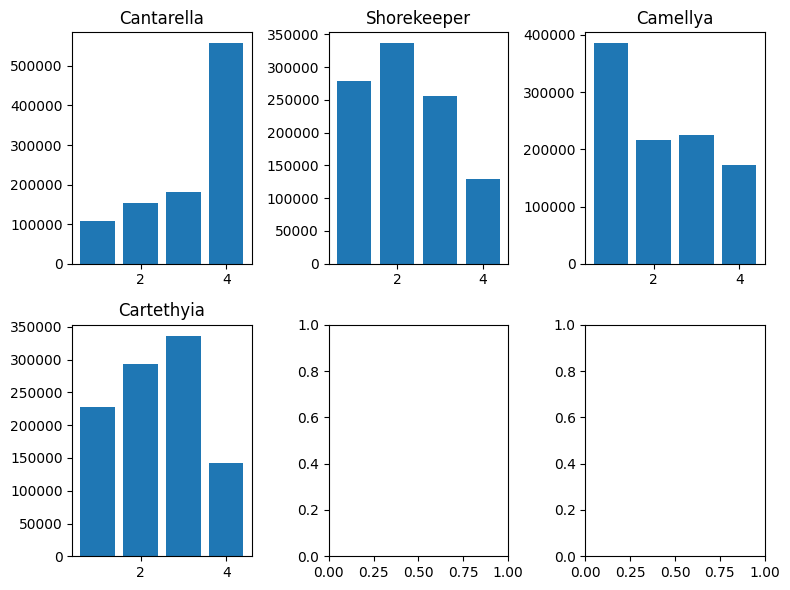

In [3]:
# Create subplots
columns = 3
rows = (len(data) + columns - 1) // columns
fig, axes = plt.subplots(rows, columns, figsize=(8, 6))

# Plot each array separately
axes = axes.flatten()

for i, (name, values) in enumerate(data.items()):
    counter = collections.Counter(values)
    axes[i].bar(counter.keys(), counter.values())
    axes[i].set_title(name)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [4]:
analysis = {}

for char, ranks in data.items():
    ranks = np.array(ranks)
    analysis[char] = {
        "Mean Rank": np.mean(ranks),
        "Median Rank": np.median(ranks),
        "Std Rank": np.std(ranks),
        "P(top1)": np.sum(ranks <= 1) / len(ranks),
        "P(top2)": np.sum(ranks <= 2) / len(ranks),
        "P(top3)": np.sum(ranks <= 3) / len(ranks)
    }

pd.DataFrame(analysis).T.sort_values(by="P(top1)", ascending=False)

,Mean Rank,Median Rank,Std Rank,P(top1),P(top2),P(top3)
Camellya,2.184206,2.0,1.124552,0.385269,0.602428,0.828097
Shorekeeper,2.235098,2.0,0.997398,0.278780,0.614830,0.871292
Cartethyia,2.392981,2.0,0.990217,0.228417,0.521176,0.857426
Cantarella,3.187715,4.0,1.051545,0.107534,0.261566,0.443185


In [5]:
analysis = {}

for char, ranks in data.items():
    ranks = np.array(ranks)
    analysis[char] = {
        "P(rank=1)": np.sum(ranks == 1),
        "P(rank=2)": np.sum(ranks == 2),
        "P(rank=3)": np.sum(ranks == 3),
        "P(rank=4)": np.sum(ranks == 4),
    }

pd.DataFrame(analysis).T.sort_values(by="P(rank=1)", ascending=False)

,P(rank=1),P(rank=2),P(rank=3),P(rank=4)
Camellya,385269,217159,225669,171903
Shorekeeper,278780,336050,256462,128708
Cartethyia,228417,292759,336250,142574
Cantarella,107534,154032,181619,556815
